<a href="https://colab.research.google.com/github/ryanjebash7/20AI41-mini-project-/blob/main/face_recongition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

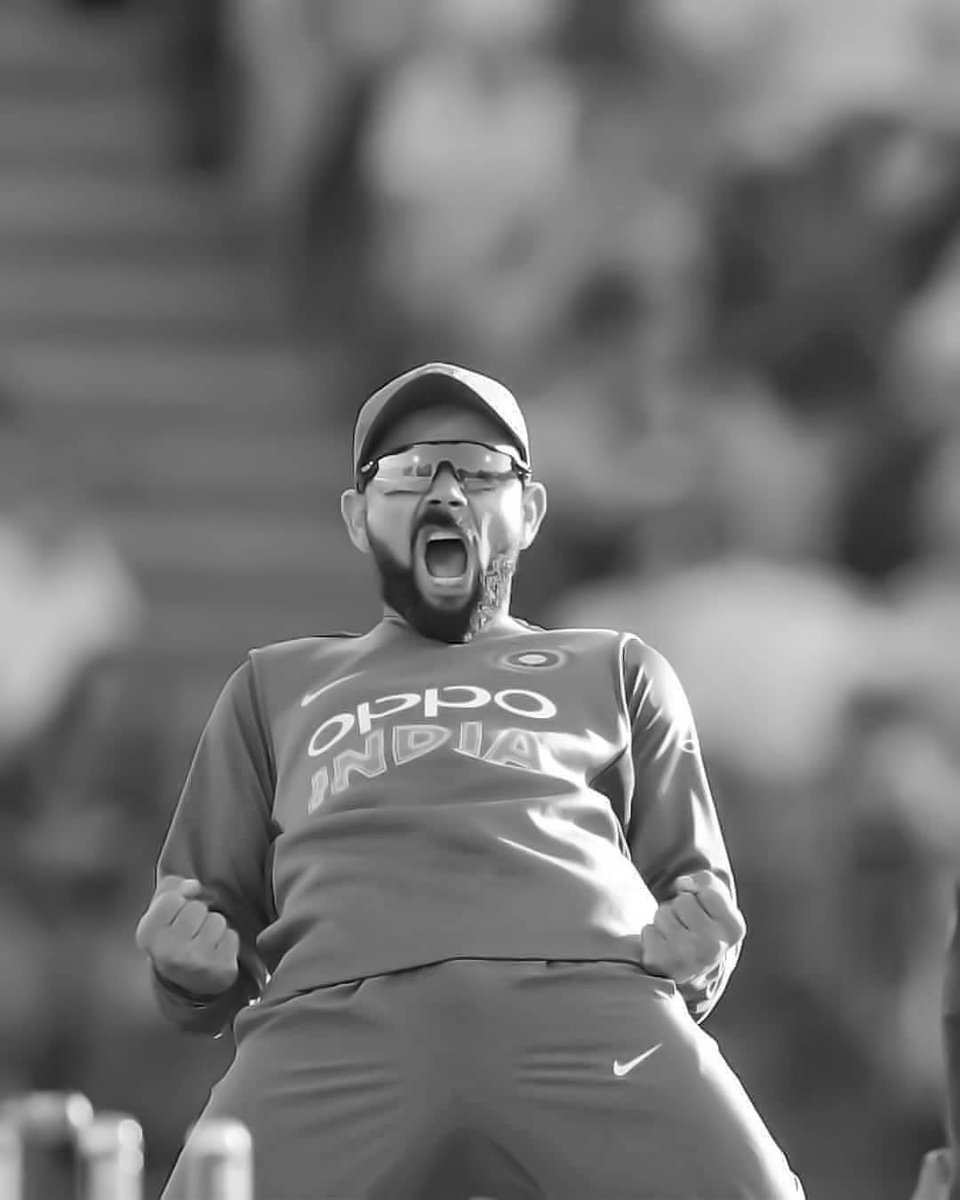

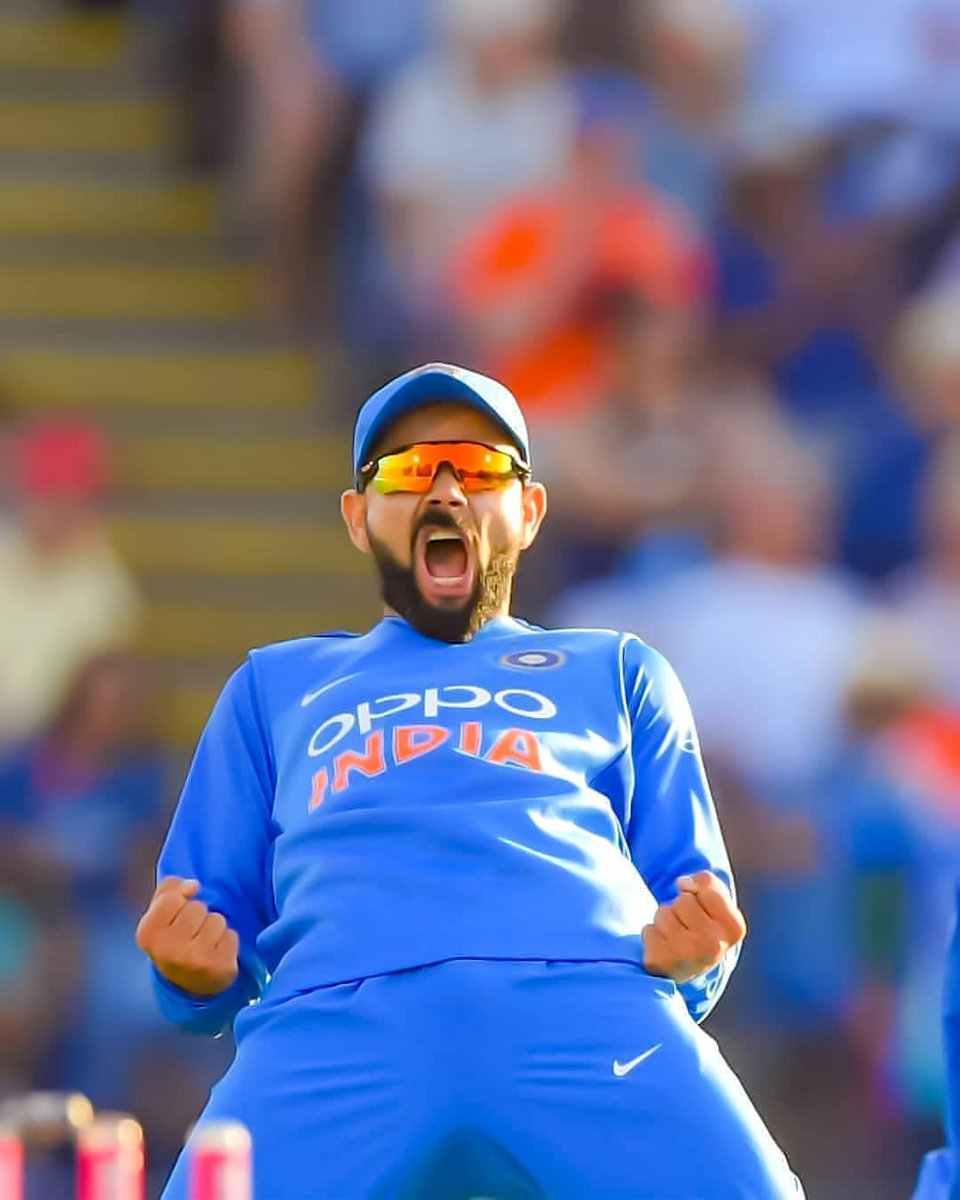

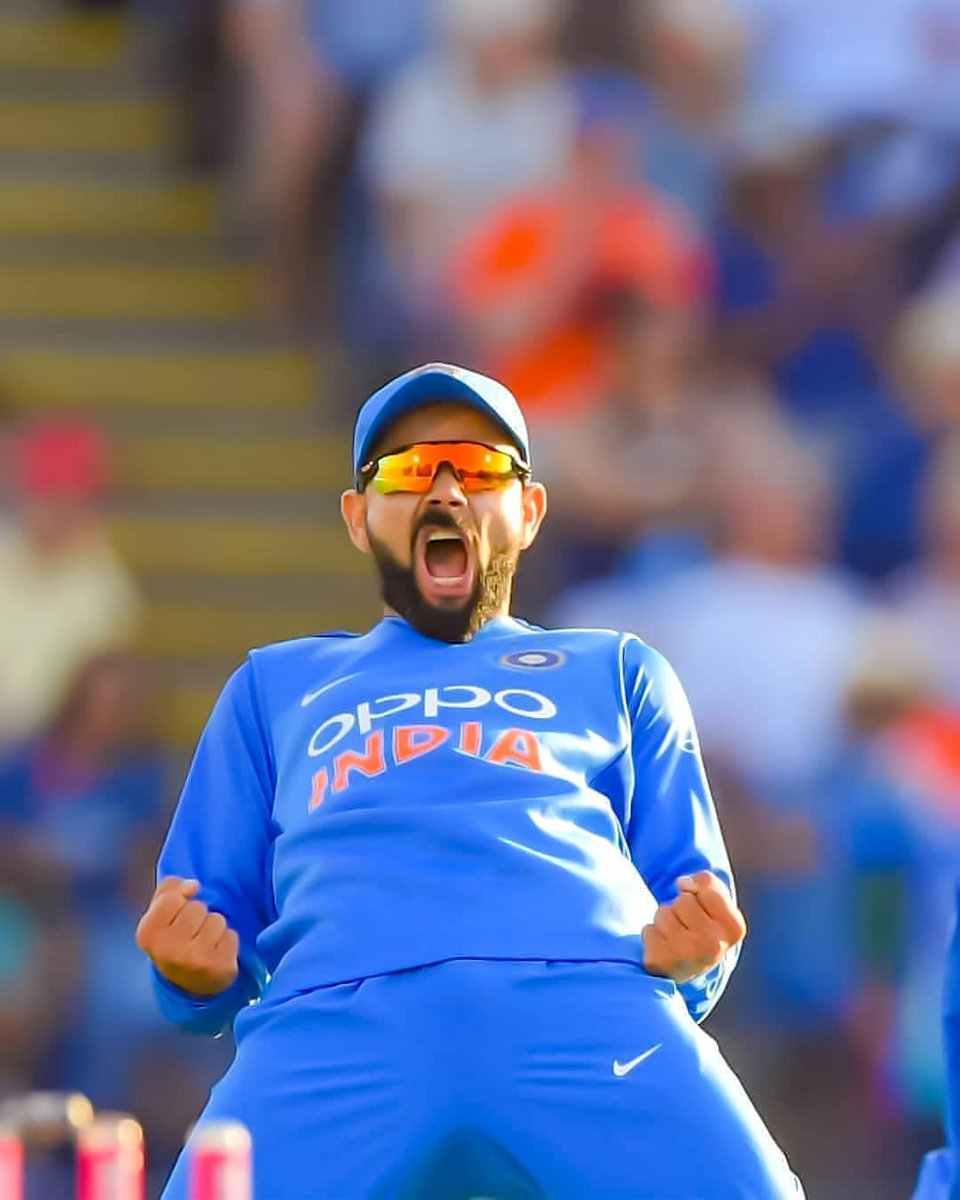

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import imutils
img = cv2.imread("/content/vk.jpg",0)
img1 = cv2.imread("/content/vk.jpg",1)
img2 = cv2.imread("/content/vk.jpg",-1)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(img1)
cv2_imshow(img2)

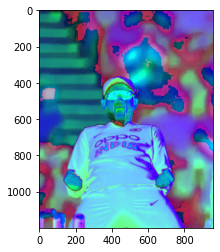

In [ ]:
hsv_image = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

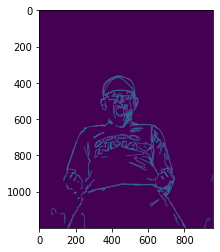

In [ ]:
edges = cv2.Canny(img,100,150) 
plt.imshow(edges)

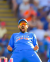

In [ ]:
resize = imutils.resize(img1,width=50)
cv2_imshow(resize)

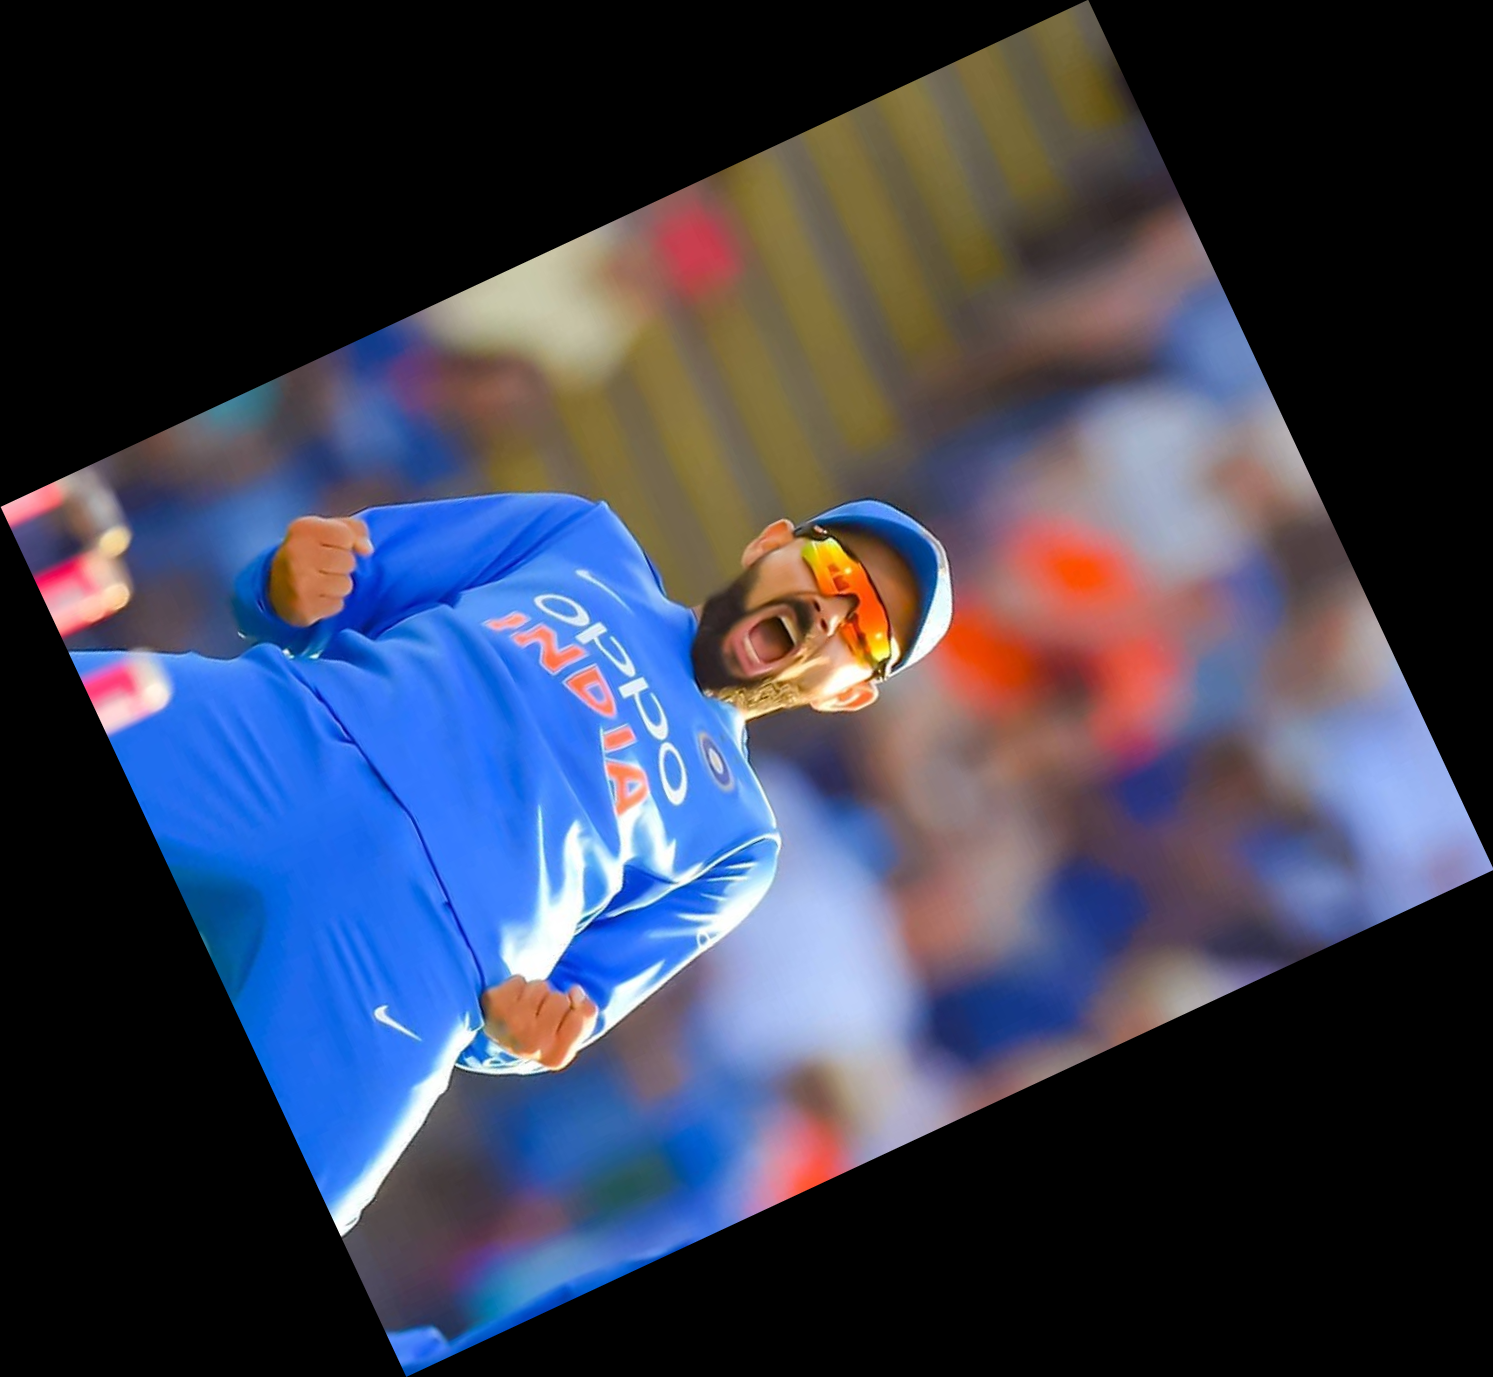

In [ ]:
rotate = imutils.rotate_bound(img1,65)
cv2_imshow(rotate)

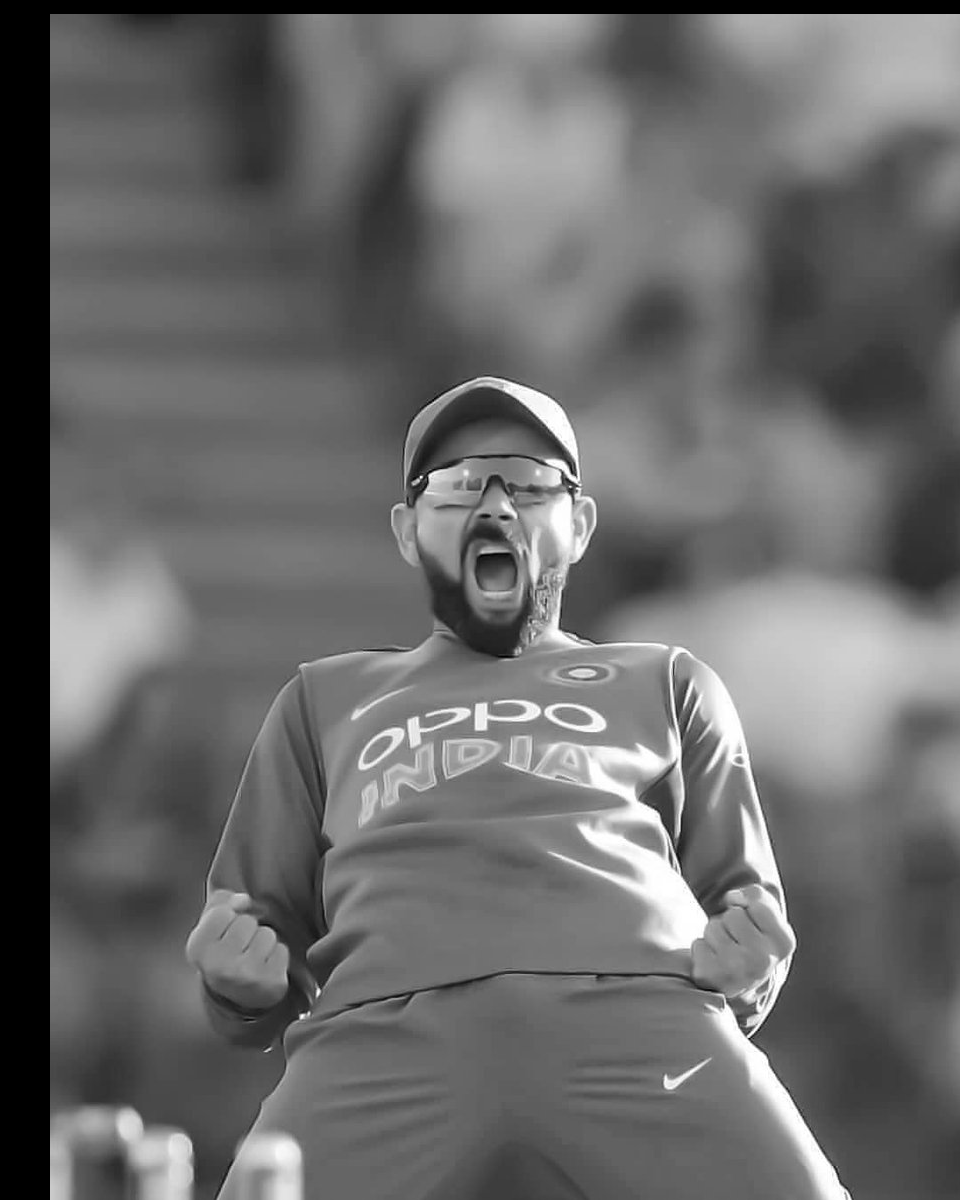

In [ ]:
translate = imutils.translate(img,50,14)
cv2_imshow(translate)

In [1]:
sk = imutils.skeletonize(img,size(6,6))
plt.show

NameError: ignored

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
 
 
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-09-12 09:38:14--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.006s  

Last-modified header missing -- time-stamps turned off.
2022-09-12 09:38:15 (4.58 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-09-12 09:38:15--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt,model)
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread("/content/pk.jpg")
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


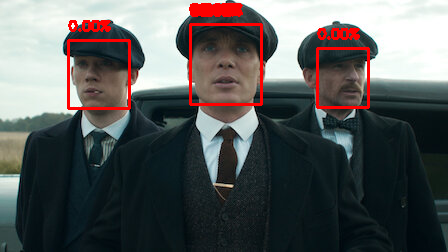

PK


In [ ]:
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence >10 )
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255),2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)
print("PK")

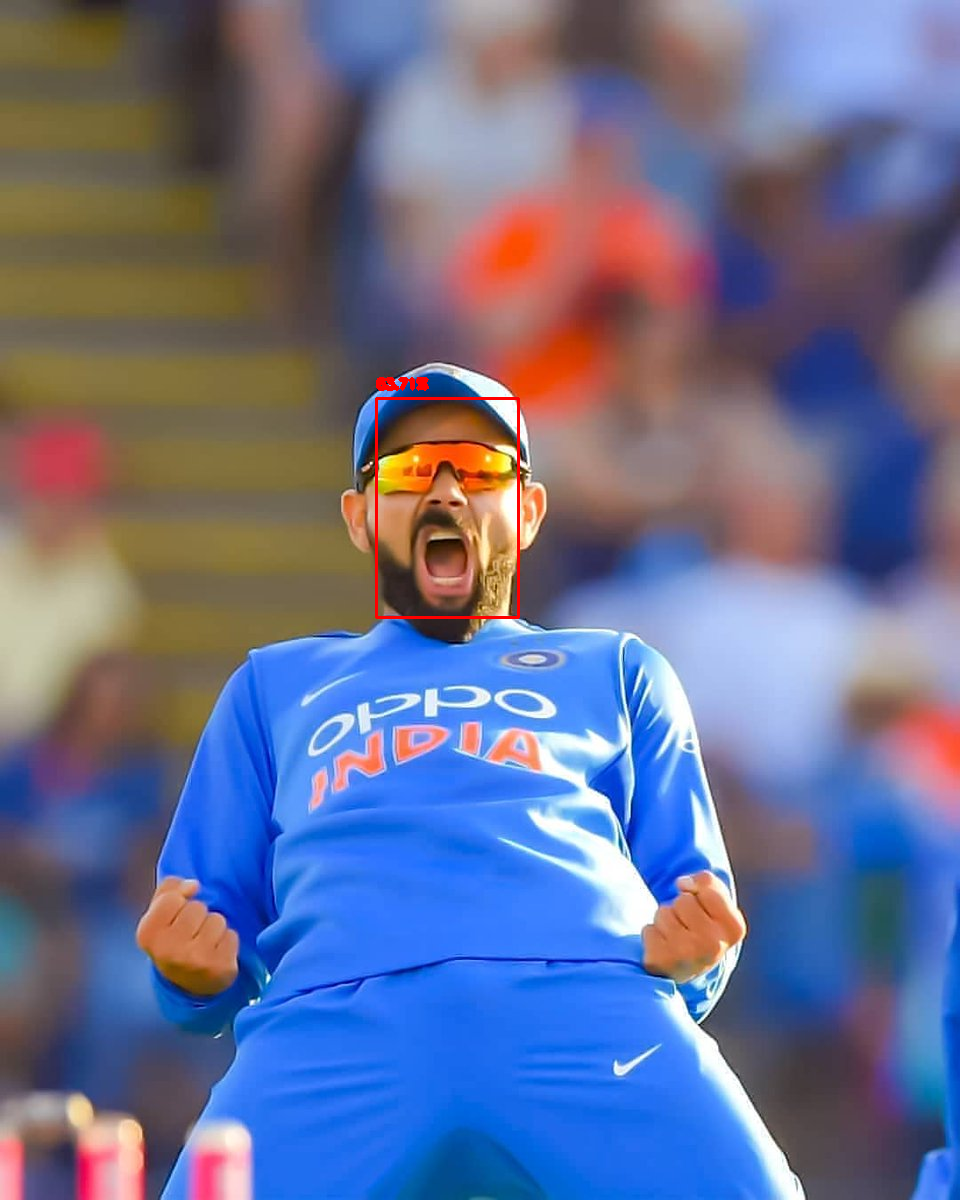

In [ ]:
cv2_imshow(image)